In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

## Support Vector Classifier

In [2]:
np.random.seed(5)
X = np.random.randn(20,2)
y = np.repeat([0,1], 10)
X[y == 1] = X[y == 1]+1
X = pd.DataFrame(X, columns=['X1', 'X2'])
X

,X1,X2
0,0.441227,-0.330870
1,2.430771,-0.252092
2,0.109610,1.582481
3,-0.909232,-0.591637
4,0.187603,-0.329870
5,-1.192765,-0.204877
6,-0.358829,0.603472
7,-1.664789,-0.700179
8,1.151391,1.857331
9,-1.511180,0.644848


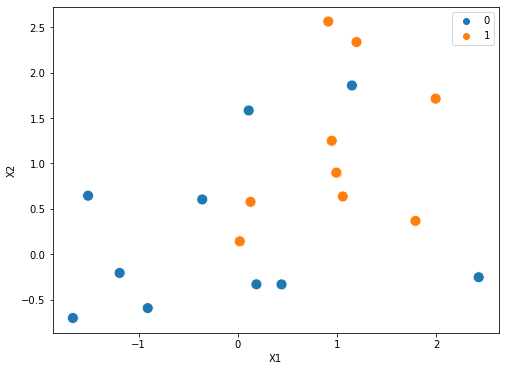

In [3]:
plt.figure(figsize=(8,6))
sb.scatterplot(X['X1'], X['X2'], s=120, hue=y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [23]:
def plot_svc(svc, X1, X2, y, h=0.01, pad=0.25, test_plot=False):
    x_min, x_max = X1.min()-pad, X1.max()+pad
    y_min, y_max = X2.min()-pad, X2.max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    sb.scatterplot(X1, X2, s=120, hue=y)
    # Support vectors indicated in plot by vertical lines
    if test_plot==False:
        sv = svc.support_vectors_
        plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=30, linewidths='0.1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()
    display('Number of support vectors: {}'.format(svc.support_.size))

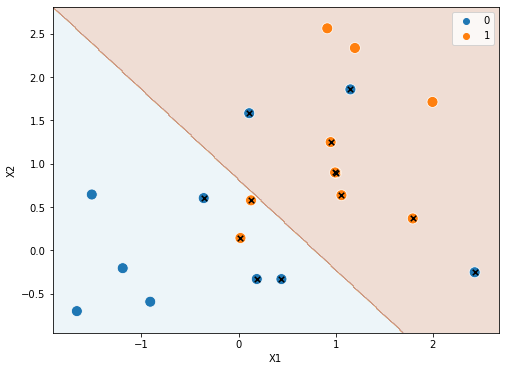

'Number of support vectors: 13'

In [24]:
svc = SVC(C=1, kernel='linear')
svc.fit(X, y)
plot_svc(svc, X['X1'], X['X2'], y)

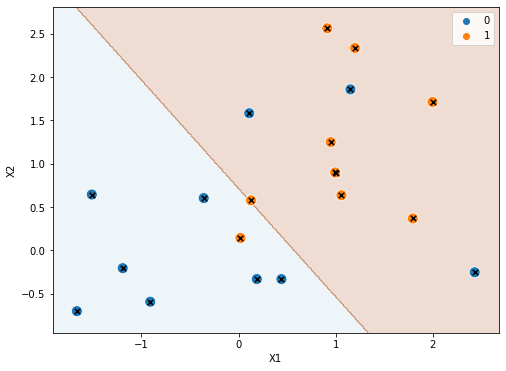

'Number of support vectors: 20'

In [25]:
svc = SVC(C=0.01, kernel='linear')
svc.fit(X, y)
plot_svc(svc, X['X1'], X['X2'], y)

In [15]:
c_range = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), c_range, cv=10, scoring='accuracy')
clf.fit(X, y)
clf.cv_results_

{'mean_fit_time': array([0.00222957, 0.00174956, 0.00150952, 0.00149629, 0.00151544,
        0.00148938, 0.00167415]),
 'std_fit_time': array([3.56487351e-04, 1.57498808e-04, 1.17653527e-04, 6.54572944e-05,
        6.12435843e-05, 5.43001598e-05, 2.93206921e-04]),
 'mean_score_time': array([0.00166097, 0.00138018, 0.00116212, 0.00113573, 0.00115361,
        0.00114179, 0.00113523]),
 'std_score_time': array([2.51282352e-04, 2.08708946e-04, 9.41455196e-05, 4.44987951e-05,
        4.58648443e-05, 5.57790444e-05, 6.30587395e-05]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split1_test_score': array([0.5, 0.5, 0.5, 0. , 0. , 0. , 0. ]),
 'split2_test_score': array([0.5, 0.5, 0

In [16]:
clf.best_params_

{'C': 0.001}

In [17]:
np.random.seed(5)
X_test = np.random.randn(20,2)
y_test = np.random.choice([0,1], 20)
X_test[y_test == 1] = X_test[y_test == 1]+1
X_test = pd.DataFrame(X_test, columns=['X1', 'X2'])

In [21]:
svc2 = SVC(C=0.01, kernel='linear')
svc2.fit(X, y)
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc2.classes_, columns=['Pred 0', 'Pred 1'])

,Pred 0,Pred 1
0,10,4
1,2,4


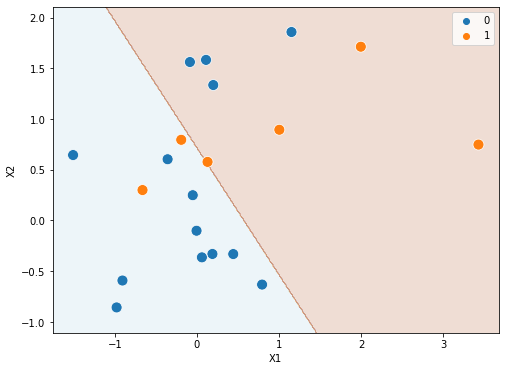

'Number of support vectors: 20'

In [26]:
plot_svc(svc2, X_test['X1'], X_test['X2'], y_test, test_plot=True)